In [148]:
# Import necessary things
import numpy as np
import matplotlib.pyplot as plt
import pyart
%matplotlib inline

In [149]:
def noisefloor_difference(filename):
    # Read in file
    radar = pyart.io.cfradial.read_cfradial(filename, file_field_names=True) 
    #radar = pyart.aux_io.read_gamic(filename, file_field_names=True) 
    # Get string of the date and time
    # Format: 'YYYY-MM-DDTHH:MM:SSZ'
    date_time = radar.time['units'].replace('seconds since ', '')
    # Get variables
    #uzh = radar.fields['UZh']['data']
    #uzv = radar.fields['UZv']['data']
    #snrh = radar.fields['SNRh']['data']
    #snrv = radar.fields['SNRv']['data']
    #sph = radar.fields['SIGPOWh']['data']
    #spv = radar.fields['SIGPOWv']['data']
    #sqih = radar.fields['SQIh']['data'] #quality index
    #sqiv = radar.fields['SQIv']['data'] #quality index
    uzh = radar.fields['reflectivity']['data']
    uzv = radar.fields['reflectivity_v']['data']
    snrh = radar.fields['signal_to_noise_ratio_copolar_h']['data']
    snrv = radar.fields['signal_to_noise_ratio_copolar_v']['data']
    #sph = radar.fields['SIGPOWh']['data']
    #spv = radar.fields['SIGPOWv']['data']
    sqih = radar.fields['normalized_coherent_power']['data'] #quality index
    sqiv = radar.fields['normalized_coherent_power_v']['data'] #quality index
    r = radar.range['data']
    # Find indices of the top 15 deg. in elevation angle        
    top15idx = []
    for i in range(0,len(radar.elevation['data'])):
        if radar.elevation['data'][i] > 82.5 and radar.elevation['data'][i] < 97.5:
            top15idx.append(i)
    # Find indices at ranges greater than 5 km
    r_above5idx = np.where(r > 5000.)[0]
    # Pull all noise values from Zh and Zv and bin them in 1 dB increments
    # Subtract range term from UZx
    # Left with the noise variable
    noise_h = []
    noise_v = []
    noise_hv = []
    for i in top15idx:
        for j in r_above5idx:
            if uzh[i,j] <= -10. and uzv[i,j] <= -10. and sqih[i,j] < 0.3 and sqiv[i,j] < 0.3:
                noise_h.append(uzh[i,j] - (20*np.log10(r[j])))
                noise_v.append(uzv[i,j] - (20*np.log10(r[j])))
                noise_hv.append((uzh[i,j]-(20*np.log10(r[j]))) - (uzv[i,j]-(20*np.log10(r[j]))))
    # Histogram the data and find the peak value
    b = np.arange(401)*0.125-140
    # Horizontal
    n_h, bins_h, patches_h = plt.hist(noise_h, bins=b)
    pk_h = np.where(n_h == np.max(n_h))
    peak_h = bins_h[pk_h]
    # Vertical
    n_v, bins_v, patches_v = plt.hist(noise_v, bins=b)
    pk_v = np.where(n_v == np.max(n_v))
    peak_v = bins_v[pk_v]
    # H - V
    bb = np.arange(401)*0.125-40
    n_hv, bins_hv, pathces_hv = plt.hist(noise_hv, bins=bb)
    pk_hv = np.where(n_hv == np.max(n_hv))
    peak_hv = bins_hv[pk_hv]

    return date_time, peak_h, peak_v, peak_hv

2018-10-28 04:10:55 0:00
2018-10-28 02:10:55 0:00
2018-10-28 02:25:55 0:00
2018-10-28 08:07:15 0:00
2018-10-28 03:40:55 0:00
2018-10-28 07:55:55 0:00
2018-10-28 06:25:55 0:00
2018-10-28 05:25:55 0:00
2018-10-28 00:22:15 0:00
2018-10-28 03:55:55 0:00
2018-10-28 06:52:15 0:00
2018-10-28 07:52:15 0:00
2018-10-28 04:40:55 0:00
2018-10-28 04:07:15 0:00
2018-10-28 00:37:15 0:00
2018-10-28 07:37:15 0:00
2018-10-28 02:40:55 0:00
2018-10-28 08:10:55 0:00
2018-10-28 04:52:15 0:00
2018-10-28 06:22:15 0:00
2018-10-28 00:40:55 0:00
2018-10-28 01:55:55 0:00
2018-10-28 01:10:55 0:00
2018-10-28 00:55:56 0:00
2018-10-28 03:25:55 0:00
2018-10-28 02:22:15 0:00
2018-10-28 06:40:55 0:00
2018-10-28 07:10:55 0:00
2018-10-28 01:07:15 0:00
2018-10-28 01:37:15 0:00
2018-10-28 03:37:15 0:00
2018-10-28 07:40:55 0:00
2018-10-28 03:22:15 0:00
2018-10-28 01:25:55 0:00
2018-10-28 07:22:15 0:00
2018-10-28 05:10:55 0:00
2018-10-28 06:07:15 0:00
2018-10-28 01:52:15 0:00
2018-10-28 05:55:55 0:00
2018-10-28 06:37:15 0:00


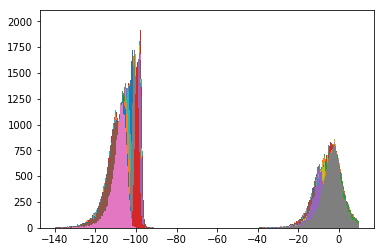

In [150]:
# Run this function on a bunch of files (try data from one day)
import os
import glob

DATE = []
H = []
V= []
HV = []

for filepath in glob.glob(os.path.join('/home/hunzinger/data/hsrhi_1028/', 'corcsapr2cfrhsrhi*.20181028*.nc')):
    dt,ph,pv,phv = noisefloor_difference(filepath)
    print(dt)
    DATE.append(dt)
    H.append(ph)
    V.append(pv)
    HV.append(phv)

66
66
66
['00:22:15', '', '', '', '', '', '01:07:15', '', '', '', '', '', '01:52:15', '', '', '', '', '', '02:37:15', '', '', '', '', '', '03:22:15', '', '', '', '', '', '04:07:15', '', '', '', '', '', '04:52:15', '', '', '', '', '', '05:37:15', '', '', '', '', '', '06:22:15', '', '', '', '', '', '07:07:15', '', '', '', '', '', '07:52:15', '', '', '', '', '']


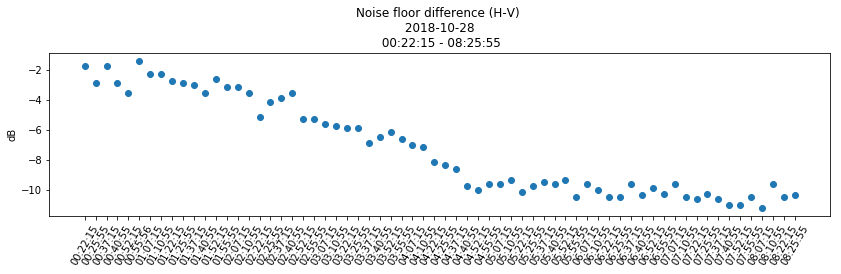

In [173]:
print(len(DATE))
print(len(HV))
HVfix = []
for i in range(0,len(HV)):
    HVfix.append(HV[i][0])
DATE = np.asarray(DATE)
TIME = []
for i in range(0,len(DATE)):
    #TIME.append(DATE[i].replace('2018-10-06T',''))
    #TIME.append(DATE[i].replace('2018-10-20',''))
    TIME.append(DATE[i][11:19])
    
# idx works on np.array and not lists.
list1 = np.array([3,2,4,1])
list2 = np.array(["three","two","four","one"])
idx   = np.argsort(list1)

list1 = np.array(list1)[idx]
list2 = np.array(list2)[idx]

idxx = np.argsort(TIME)
print(len(idxx))
TIME_s = np.array(TIME)[idxx]
HVfix_s = np.array(HVfix)[idxx]
DATE_s = np.array(DATE)[idxx]


#TIME_ticks = np.empty(len(TIME_s))
TIME_ticks = []
for i in range(0,len(TIME_s)):
    if i%6 == 0:
        TIME_ticks.append(TIME_s[i])
        #TIME_ticks[i] = TIME_s[i]
    else: 
        TIME_ticks.append('')
        #TIME_ticks[i] = np.nan
        
print(TIME_ticks)


#print(HV[0][0])
#print(HVfix)
#print(DATE)
#plt.plot(HVfix)
#plt.show()
# Plot time series of the noise floor difference (h-v)
plt.figure(figsize=[14,3])
plt.scatter(DATE_s,HVfix_s,marker='o')
#plt.scatter(DATE,MZDR1,
#            marker='*',
#            c=NZDR,
#            cmap='winter_r',
#            label='ZDR1')
#plt.legend()
plt.ylabel('dB')
plt.title('Noise floor difference (H-V) \n 2018-10-28 \n 00:22:15 - 08:25:55')

# Chnage x-tick labels to make more readable
#TIME = DATE.replace('2018-10-05','')

#TIME = []
#for i in DATE:
#    TIME.append(i.replace('2018-10-05T',''))
plt.xticks(np.arange(len(TIME)),sorted(TIME),rotation=60)
#plt.xticks(np.arange(len(TIME)),TIME,rotation=60)

plt.show()

from scipy import optimize
def test_func(x, a, b):
    return a * np.sin(b * x)
params, params_covariance = optimize.curve_fit(test_func, np.arange(len(DATE_s)), HVfix_s,
                                               p0=[2, 2])

#print(params)
#plt.figure(figsize=[10,3])
#plt.scatter(np.arange(len(DATE)),HVfix_s,marker='o')
#plt.ylabel('dB')
#plt.title('Noise floor difference (H-V) \n 2018-10-05 \n 15:5239 - 22:37:39')
#labels = TIME
#plt.xticks(np.arange(len(TIME)),sorted(TIME),rotation=60)
#plt.xticks(np.arange(len(TIME)),sorted(labels),rotation=60)
#plt.plot(np.arange(len(DATE_s)),test_func(HVfix_s, params[0], params[1]),
#         label='Fitted function')




In [180]:
labels = TIME
#labels[2::2]

10 10


TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

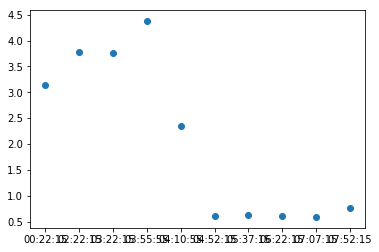

In [188]:
TIME2 = ['01:45:53Z','02:15:53Z','03:30:53Z','04:15:53Z','05:45:53Z','06:30:53Z','07:00:53Z','08:15:53Z','09:15:53Z']
zdr = [1.596704,0.43311208,0.44385442,0.5068437,0.56104374,0.96925306,0.95256126,0.962417,0.77882046]
TIME2 = ['00:15:03','02:00:04','02:45:03','03:45:03','04:30:04','05:30:04','06:45:04Z','07:00:04Z','07:15:04Z','07:30:04Z','07:45:04Z','08:45:04Z','09:45:04Z']
zdr = [5.31109,2.9233,3.2109,3.02735,2.777413,2.9158909,0.7316049,0.5489517,0.58511617,0.5869472,0.6027405,0.66133606,0.8819849]
TIME2 = ['00:22:15','02:22:15','03:22:15','03:55:55','04:10:55','04:52:15','05:37:15','06:22:15','07:07:15','07:52:15']
zdr = [3.1439,3.779485,3.7617485,4.3780,2.3487,0.602416,0.62928,0.611893,0.58557,0.76525]
print(len(TIME2), len(zdr))
plt.scatter(TIME2,zdr)
#sidx = [8,10,15,18,24,28,30,35,39]
#sidx = [1,15,21,29,35,43,53,55,57,59,69,75]
sidx = [0,16,24,29,31,36,42,48,54,60]
fill = np.empty((len(DATE)))
fill[:] = np.nan
for i in range(0,len(TIME2)):
    fill[sidx[i]] = zdr[i]
    
fill
plt.scatter()


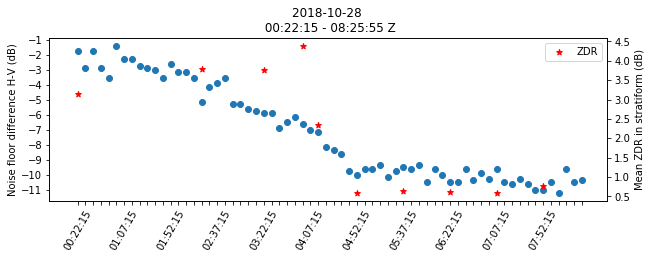

In [189]:
# Plot time series of the noise floor difference (h-v)
#plt.figure(figsize=[10,3])
#plt.scatter(DATE_s,HVfix_s,marker='o')
#plt.scatter(DATE_s,fill,marker='*')
#plt.ylabel('dB')
#plt.title('Noise floor difference (H-V) \n 2018-10-20 \n 00:07:39 - 10:37:39')
#plt.xticks(np.arange(len(TIME)),sorted(TIME),rotation=60)
#plt.show()

fig, ax1 = plt.subplots(figsize=[10,3])
hv = ax1.scatter(DATE_s,HVfix_s,marker='o',label='H-V')
ax1.set_ylabel('Noise floor difference H-V (dB)')
ax1.set_title('2018-10-28 \n 00:22:15 - 08:25:55 Z')
ax1.set_xticklabels(sorted(TIME),rotation=60)
#ax1.flat.set_major_locator(plt.MaxNLocator())
ax1.locator_params(nbins=12)
ax2 = ax1.twinx()
zd = ax2.scatter(DATE_s,fill,marker='*',color='r',label='ZDR')
ax2.set_ylabel('Mean ZDR in stratiform (dB)')
#ax2.set_xticklabels(sorted(TIME),rotation=60)
ax2.set_xticklabels(TIME_ticks,rotation=60)
ax2.locator_params(nbins=12)
ax2.legend()
#ax1.legend()
#var = hv+zd
#labs = [l.get_label() for l in var]
#ax1.legend(var,labs,prop={'size':16})

plt.show()
#print(sorted(TIME))

#plt.xticks(np.arange(len(TIME)),sorted(labels),rotation=60)